# Biggest question?-- Why CNN?

The MNIST problem, which is an image based problem. I am able to achieve an accuracy of 96.5% using MLP model. So, I Generalized that MLP can be used for any image based problem and solve it in similar way. So, I had a question---Why CNN?

I read a wonderful blog on CNN by [Adit Deshpande](https://adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks/). I would re-iterate the same understanding here. 

**What's the actual problem?**

Image classification is the task of taking an input image and outputting a class (a cat, dog, etc) or a probability of classes that best describes the image. For humans, this task of recognition is one of the first skills we learn from the moment we are born and is one that comes naturally and effortlessly as adults. Without even thinking twice, we are able to quickly and seamlessly identify the environment we are in as well as the objects that surround us. When we see an image or just when we look at the world around us, most of the time we are able to immediately characterize the scene and give each object a label, all without even consciously noticing. The skills of being able to quickly recognize patterns, generalize from prior knowledge and adapt to different image environments. Machines don't have this skill set.

**Inputs and Outputs**

When a computer sees an image (takes an image as input), it will see an array of pixel values, depending on the resolution and size of the image. Assume, if the image size is a 32 x 32 x 3 array of numbers (The 3 refers to RGB values). Assume, we have a color image in JPG form and its size is 480 x 480. The representative array will be 480 x 480 x 3 (within the computer, as 3 represents the RGB channel). Each of these numbers will be of a value between 0 to 255 which describes the pixel intensity at that point. Even, though these numbers seem meaningless to us. But, the computer can only understand the language of numbers and in fact, this array representation will only be the inputs available to the computer. The idea is that when this input array of numbers is given to the computer, after applying the CNN algorithm, the output will be numbers that describe the probability of the image being a certain class (0.80 for cat, 0.15 for dog, 0.05 for bird, etc).
What is expected from the Computer?
So, after understanding the problem and how the input and output would be, the next step is to understand How to approach the problem. We expect the computer to differentiate between all the images it is given and then figure out the unique features that make a dog or that make a cat (means we are expecting the computer or our model to find the patterns, which will recognize the dog as a dog and the cat as a cat), here the pattern finding means to find the best weights to our model. Even in our mind subconsciously, we would do the same process we process. When we look at a picture of a dog with our eyes, we can classify it as a dog if the picture has identifiable features such as paws and its facial pattern and other dog-related features. In a similar way, the computer is able to perform the task of image classification in a step-by-step process by looking for low-level features such as edges and curves initially and then building more abstract concepts through a series of convolutional layers.

**Biological Connection**

Before stepping into further details, let's understand biological inspiration from where CNN has been designed. CNNs do take biological inspiration from the visual cortex. The visual cortex has small regions of cells that are sensitive to specific regions of the visual field. This idea was expanded upon by a fascinating experiment by Hubel and Wiesel in 1962 (Video) where they showed that some individual neuron cells in the brain responded (or fired) only in the presence of edges of a certain orientation. For example, some neurons fired when exposed to vertical edges and some when shown horizontal or diagonal edges. Hubel and Wiesel found out that all of these neurons were organized in a columnar architecture and that together, were able to produce visual perception. 
This idea of specialized components inside of a system having specific tasks (the neuron cells in the visual cortex looking for specific characteristics) is where models are designed with multiple layers with different layers doing different tasks (1st layer doing edge detection, 2nd layer doing slightly more than edge detection, etc..). This article explains in-depth biological inspiration.

**Structure**

A more detailed overview of what CNNs do would be that - the image is passed as an input, then- pass it through a series of convolutional layers along with non-linear activation functions, then- pooling (downsampling), then - fully connected layers, then - flatten layer, and then - get an output. The output can be a single class or a probability of classes that best describes the image. Now, the further analysis would be on understanding each of these layers.


![image.png](attachment:4dd72296-a126-4964-905c-315ad83d188f.png)


After learning about CNN, I got to understand that there is no hard and fast rule that only CNNs to be used for image classification.Both MLP and CNN can be used for Image classification however MLP takes vector as input and CNN takes tensor as input so CNN can understand spatial relation(relation between nearby pixels of image)between pixels of images better thus for complicated images CNN will perform better than MLP.CNN is designed to work for Images or Videos classification.

# About the MNIST Dataset

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. This dataset is considered to be the "hello world" dataset for Computer Vision.

But, I am using it for MLP to experiment all the state of the art concepts (batch normalization and dropouts).

# Import all the required libraries

In [1]:
!pip install keras_sequential_ascii
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for keras_sequential_ascii: filename=keras_sequential_ascii-0.1.1-py3-none-any.whl size=3060 sha256=c16a7606ab5a4a5842aa16fa4462775c7dc486be4eb283927365c5798d74efac
  Stored in directory: /root/.cache/pip/wheels/67/8d/db/f44305967500e96c1c57b4e42151af8d0b81d5d60d35220a7c
Successfully built keras_sequential_ascii
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 15.1 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd

#import all the keras related libraries

from keras.models import Sequential  
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from tensorflow import keras


#model analyzing libraries
from keras_sequential_ascii import keras2ascii
import visualkeras

#import plotting libraries 
import plotly.express as px
import matplotlib.pyplot as plt
import plotly as py

# Ignore warnings while installing as well as in the below cells
import warnings
warnings.filterwarnings('ignore')

#to pick random seed and random points from dataset
import random                        

# Load the dataset

In [3]:
from google.colab import drive

drive.mount('/content/drive')

!cp /content/drive/MyDrive/Abdulla_OCR/Character/anotation_28x28/Test.csv .
!cp /content/drive/MyDrive/Abdulla_OCR/Character/anotation_28x28/Train.csv .

!rm -rf sample_data

Mounted at /content/drive


In [2]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv("Test.csv")

print(f"The shape of TRAIN DATA is {train_data.shape}\nThe shape of TEST DATA is {test_data.shape}")

The shape of TRAIN DATA is (209966, 785)
The shape of TEST DATA is (34966, 784)


In TRAIN DATA, there is one column additional to the TEST DATA, that's because of the target variable/feature for the TRAIN DATA. The best part is, MNIST data is actually an image dataset, which is of 28x28 image. But, it has been flattened to 784 dimensions.

# Distrubution of target variable 

In [3]:
class_label = list(train_data['label'].value_counts().index)
class_label = [str(each_label) for each_label in class_label]
count = list(train_data['label'].value_counts().values)

target_var_dist = pd.DataFrame({"Class label":class_label,"Count":count})
px.bar(target_var_dist,target_var_dist['Class label'],target_var_dist['Count'],color=target_var_dist['Class label'])

It's very rare to find such kind of distribution in real world (where the data is close to equal/uniformly distributed). If the data is uniformly distributed between all the classes(target variable) then the chance of biasedness reduces a lot---which is one of the ideal condition in building a model.

Splitting and Arranging the Data accordingly as per to fit the model

In [4]:
target_variable   = train_data['label']
actual_train_data = train_data.drop(columns='label')

print(f"The shape of TARGET VARIABLE is {target_variable.shape}\nThe shape of ACTUAL TRAIN DATA is {actual_train_data.shape}")

The shape of TARGET VARIABLE is (209966,)
The shape of ACTUAL TRAIN DATA is (209966, 784)


Splitting the TRAIN DATA further into validation(X_val) and train(X_train) | and their respective class labels too

In [5]:
X_train, X_val, y_train, y_val = train_test_split(actual_train_data, target_variable, test_size=0.2, random_state=42)

print(f" The shape of X_train variable is {X_train.shape} \n The shape of y_train variable is {y_train.shape} \n The shape of X_val variable is {X_val.shape} \n The shape of y_val variable is {y_val.shape}")

 The shape of X_train variable is (167972, 784) 
 The shape of y_train variable is (167972,) 
 The shape of X_val variable is (41994, 784) 
 The shape of y_val variable is (41994,)


Visualizing the images in-detail and pre-processing them is explained in detail in the below mentioned notebook. Please refer there. 

https://www.kaggle.com/code/mvschamanth/mlp-model-in-keras-with-high-accuracy-of-97

## Pre-processing the data

It is also called as Scaling (or) Normalizing the data
 
The pixel values range from 0 to 255: the background majority close to 0, and those close to 255 representing the digit.

Although raw pixel values can be used directly, it is better to normalize the input data as to avoid large gradient values that could make training difficult.

As,stochastic gradient descent is being used to train the model,the chance of getting stuck in local optima will not be an issue when SCALING is being done and it also speeds up the training.

Neural network activations need the inputs to be scaled because scaling can also helps in preventing vanishing and exploding gradient problems.

Normalizing the data to the interval (0,1)--it is not really required because all the pixel values already lie in the range of (0,255).

In [6]:
# The values are ranging between 0 and 255. So, Xmin will be 0 and Xmax will be 255. 
# Actual formula -- X => (X - Xmin)/(Xmax-Xmin) 

X_train = X_train/255
X_val = X_val/255

### Reshaping the data
The data is to reshaped to the (28x28) from 784

Since the training examples are 1D vectors but the convolutions should be happening on the 2D images,the data should be reshaped to the input data from (n_train x 784) to (n_train x 28 x 28).

In [7]:
X_train_converted = X_train.values.reshape(-1,28,28,1)
X_val_converted = X_val.values.reshape(-1,28,28,1)
print(f" The shape of X_train variable is {X_train_converted.shape} \n The shape of y_train variable is {y_train.shape} \n The shape of X_val variable is {X_val_converted.shape} \n The shape of y_val variable is {y_val.shape}")

 The shape of X_train variable is (167972, 28, 28, 1) 
 The shape of y_train variable is (167972,) 
 The shape of X_val variable is (41994, 28, 28, 1) 
 The shape of y_val variable is (41994,)


In [8]:
print(f"Before upsampling --- {X_train_converted.shape}")
print(f"Before upsampling --- {X_train_converted[0].shape}")
print(f"Before upsampling --- {X_train_converted[0][1].shape}")

Before upsampling --- (167972, 28, 28, 1)
Before upsampling --- (28, 28, 1)
Before upsampling --- (28, 1)


Converting data into 32x32 as the LeNet model architecture is defined for the model, where the input would be of 32x32 dimensions. So, 28x28 dimension data is converted into 32x32 dimension data

In [9]:
X_train_converted = np.pad(X_train_converted,((0,0),(2,2),(2,2),(0,0)),'constant')
X_val_converted = np.pad(X_val_converted,((0,0),(2,2),(2,2),(0,0)),'constant')
print(f" The shape of X_train variable is {X_train_converted.shape} \n The shape of y_train variable is {y_train.shape} \n The shape of X_val variable is {X_val_converted.shape} \n The shape of y_val variable is {y_val.shape}")

 The shape of X_train variable is (167972, 32, 32, 1) 
 The shape of y_train variable is (167972,) 
 The shape of X_val variable is (41994, 32, 32, 1) 
 The shape of y_val variable is (41994,)


In [10]:
print(f"After upsampling --- {X_train_converted.shape}")
print(f"After upsampling --- {X_train_converted[0].shape}")
print(f"After upsampling --- {X_train_converted[0][1].shape}")

After upsampling --- (167972, 32, 32, 1)
After upsampling --- (32, 32, 1)
After upsampling --- (32, 1)


#### Target-variable update

Target_variable for each image is single value. This should be converted into 10-dim vector. For instance, If the class label for an image is 5, then it should be represented as [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [11]:
Y_train = keras.utils.to_categorical(y_train,num_classes=35) 
Y_val = keras.utils.to_categorical(y_val,num_classes=35)

# Convolutional Neural Network
CNN is used for image classification, object detection and Image Segmentation

#### Building a LeNet model (which is a basic CNN algorithm)
LeNet was introduced in the research paper “Gradient-Based Learning Applied To Document Recognition” in the year 1998 by Yann LeCun, Leon Bottou, Yoshua Bengio, and Patrick Haffner.

#### LeNet-5 CNN architecture
![image.png](attachment:aae213ea-440e-4bf8-8177-f714ffb098ee.png)
LeNet-5 Total seven layer , does not comprise an input, each containing a trainable parameters; each layer has a plurality of the Map the Feature , a characteristic of each of the input FeatureMap extracted by means of a convolution filter, and then each FeatureMap There are multiple neurons
![image.png](attachment:3d957938-f8b4-40b3-8cec-1fcffe602308.png)
[Much more detailed explanation is over here](https://www.kaggle.com/code/blurredmachine/lenet-architecture-a-complete-guide)


There are many blogs, which explain about the convolution, stride, pooling and padding. Here are the few references

[Easy understanding of Stride is here](https://medium.com/machine-learning-algorithms/what-is-stride-in-convolutional-neural-network-e3b4ae9baedb) 

[Better understanding about Pooling layers](https://towardsai.net/p/l/introduction-to-pooling-layers-in-cnn)

[About Padding layers](https://medium.com/codex/why-padding-is-important-in-convolutional-neural-network-cnn-8cf7e9e38ca8)







# Building the Model

[This article gives so much help on understanding of the CNN ] to Visualize how the CNN works (https://poloclub.github.io/cnn-explainer/#article-convolution)

In [23]:
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='tanh'))
model.add(Dense(84, activation='tanh'))
model.add(Dense(35, activation='softmax'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [25]:
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     32   32    1
              Conv2D    \|/  -------------------       156     0.2%
                tanh   #####     28   28    6
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     14   14    6
              Conv2D    \|/  -------------------      2416     3.8%
                tanh   #####     10   10   16
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####      5    5   16
             Flatten   ||||| -------------------         0     0.0%
                       #####         400
               Dense   XXXXX -------------------     48120    75.4%
                tanh   #####         120
               Dense   XXXXX -------------------     10164    15.9%
                tanh   #####          84
               Dense   XXXXX -------------------      2975     4.7%
             softmax   ##### 

It is always necessary to understand the shapes and number of parameters of the model before training it and getting final predictions. 

Sizes of each layer can be calculated using below formulas

An image of dimensions W_in x H_in and a filter of dimensions K x K with stride S and a padding P. Then, the output activation map would be of dimensions: 

W_out = {(W_in - K + 2P)/S} + 1

H_out = {(H_in - K + 2P)/S} + 1

After applying this formula, if found out that the output dimensions are not integers--then it means that stride S has been set incorrectly.

* When there is no padding at all, the output dimensions are ( ({W_in - K}/S) + 1,({H_in - K}/S) + 1).
* If the size of the input is unchanged after the convolution layer , then same padding can be applied. So, then W_out = W_in and H_out = H_in ==> If Stride s=1, then p = (k-1)/2


If there is a pooling kernel of dimensions r x r and a Stride s then size of the output volumne would be:

W_out = ((W_in - r)/s)+1

H_out = ((H_in -r)/s)+1


=====================================================================

Input image is of size = 32x32x1 (the image is of size 32x32 with only 1 channel--it is also called depth at times).

So, W_in = 32 , H_in = 32 and c = 1 (where c is number of channels)

1. In the first layer, there are 6 (5x5) kernels, which implement Conv2D operation with tanh as activation function. So, kernel k = 5 and if Stride s is not mentioned, then s = 1 by default and also default padding is valid--which means **no zero-padding** so, p = 0 

So, the output dimension of first layer would be

W_out = ((32-5)/1)+1

H_out = ((32-5)/1)+1

W_out x H_out = 28 x 28

W_out x H_out x channels = 28 x 28 x 6

Then, what about weights?--trainable parameters?

In Convolutional layers, the objective is to find best kernels---which are weights. So, that our model works better for the task we are solving on

We have 6 kernels, each of size 5x5 => 25 weights in each kernel => there are 6 such kernels => 25x6 = 150 + bias term to each kernel (6 bias terms altogether) ==> 150+6 = 156 weights in first layer

2. The second layer is max pooling layer---which doesn't have any weights (trainable parameters) because it is just considering the maximum value from 2x2 grid of the output from previous layer and the stride of 2 (it is default for pooling layers)

W_out = ((28-2)/2)+1

H_out = ((28-2)/2)+1

W_out x H_out = 14 x 14

W_out x H_out x channels = 14 x 14 x 6

3. In the third layer, there are 16 (5x5) kernels, which implement Conv2D operation with tanh as activation function. So, kernel k = 5 and if Stride s is not mentioned, then s = 1 by default and also default padding is valid--which means **no zero-padding** so, p = 0 

So, the output dimension of third layer would be

W_out = ((14-5)/1)+1

H_out = ((14-5)/1)+1

W_out x H_out = 10 x 10

W_out x H_out x channels = 10 x 10 x 16

Then, what about weights?--trainable parameters?

In Convolutional layers, the objective is to find best kernels---which are weights. So, that our model works better for the task we are solving on

Each kernel is of size 5x5 => 25 weights in each kernel and the input to this layer is of 14x14x6 (6 channels) => there are 25x6 = 150 weights and there are 16 Conv2D layers here. So, 150x16 = 2400 and bias term to each kernel (16 bias terms altogether) ==> 2400+16 = 2416 weights in third layer

4. The fourth layer is max pooling layer---which doesn't have any weights (trainable parameters) because it is just considering the maximum value from 2x2 grid of the output from previous layer and the stride of 2 (it is default for pooling layers)

W_out = ((10-2)/2)+1

H_out = ((10-2)/2)+1

W_out x H_out = 5 x 5

W_out x H_out x channels = 5 x 5 x 16

5. The fifth layer is flatten --- which will convert the array/matrix into the vector

5 X 5 X 16 = 400 ---- This will be the dimensions of the new vector

From, here on----it would be treated as an MLP network

6. Dense connections with 120 neurons and the input is 400 dimensions. So, number of weights will be 120 x 400 = 48000 + bias term connecting to 120 neurons. In total, 48000+120 = 48120 weights

7. Dense connections with 84 neurons and the previous layer is of 120 neurons, as this is fully connected layer---the number of weights is 120 x 84 = 10080 + bias term connecting to 84 neurons. In total, 10080 + 84 = 10164 weights

8. From the previous layer, it is again connected to 10 neurons (softmax layer). So, the number of weights is 84 x 10 = 840 + bias term connecting to 10 neurons. In total, 840 + 10 = 850 weights.

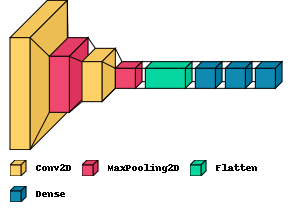

In [26]:
visualkeras.layered_view(model,legend=True)

In [27]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In depth explanation of compile function parameters and fit function parameters is explained in the below notebook. Please refer it for more detail

https://www.kaggle.com/code/mvschamanth/mlp-model-in-keras-with-high-accuracy-of-97

In [28]:
number_of_epoch = 350

In [29]:
history = model.fit(X_train_converted, Y_train, steps_per_epoch=500, epochs=number_of_epoch, verbose=1, validation_data=(X_val_converted, Y_val))

Epoch 1/350
500/500 [==============================] - 11s 17ms/step - loss: 3.4703 - accuracy: 0.0798 - val_loss: 3.2633 - val_accuracy: 0.1415
Epoch 2/350
500/500 [==============================] - 7s 13ms/step - loss: 2.8878 - accuracy: 0.2136 - val_loss: 2.6002 - val_accuracy: 0.2795
Epoch 3/350
500/500 [==============================] - 5s 11ms/step - loss: 2.4576 - accuracy: 0.3135 - val_loss: 2.3355 - val_accuracy: 0.3399
Epoch 4/350
500/500 [==============================] - 7s 13ms/step - loss: 2.2557 - accuracy: 0.3608 - val_loss: 2.1743 - val_accuracy: 0.3786
Epoch 5/350
500/500 [==============================] - 5s 11ms/step - loss: 2.1097 - accuracy: 0.3986 - val_loss: 2.0380 - val_accuracy: 0.4148
Epoch 6/350
500/500 [==============================] - 6s 12ms/step - loss: 1.9769 - accuracy: 0.4336 - val_loss: 1.9070 - val_accuracy: 0.4486
Epoch 7/350
500/500 [==============================] - 6s 12ms/step - loss: 1.8456 - accuracy: 0.4683 - val_loss: 1.7759 - val_accuracy

In [30]:
model.save("model.h5")

## Loss_plots and Accuracy_plots

In [31]:
#creating a list for no of epochs
n_epochs = list(range(1,number_of_epoch+1))

#creating a dataframe of loss and accuracy values
history_details_df = pd.DataFrame({"Number of epochs":n_epochs,"Train_Accuracy":history.history['accuracy'],"Validation_accuracy":history.history['val_accuracy'],"Train_Loss":history.history['loss'],"Validation_loss":history.history['val_loss']})

In [32]:
fig = px.line(history_details_df,x='Number of epochs',y=history_details_df.columns[1:3],color_discrete_sequence=px.colors.qualitative.Dark2,title='Accuracy plot')
fig.show()

In [33]:
fig = px.line(history_details_df,x='Number of epochs',y=history_details_df.columns[3:],color_discrete_sequence=px.colors.qualitative.Antique,title='Loss plot')
fig.show()

In [34]:
fig = px.line(history_details_df,x='Number of epochs',y=history_details_df.columns[0:],color_discrete_sequence=px.colors.qualitative.Dark2,title='Loss and Accuracy plots')
fig.show()

## Modifying the LeNet model to get the best score

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(48, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(35, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1200)              0         
                                                                 
 dense_3 (Dense)             (None, 256)              

In [18]:
model.save("model.h5")

In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
number_of_epoch = 350
history = model.fit(X_train_converted, Y_train, steps_per_epoch=500, epochs=number_of_epoch, verbose=1, validation_data=(X_val_converted, Y_val))

Epoch 1/350
500/500 [==============================] - 24s 21ms/step - loss: 1.0671 - accuracy: 0.6740 - val_loss: 0.4542 - val_accuracy: 0.8522
Epoch 2/350
500/500 [==============================] - 8s 16ms/step - loss: 0.3556 - accuracy: 0.8854 - val_loss: 0.3108 - val_accuracy: 0.8984
Epoch 3/350
500/500 [==============================] - 7s 14ms/step - loss: 0.2401 - accuracy: 0.9221 - val_loss: 0.2242 - val_accuracy: 0.9280
Epoch 4/350
500/500 [==============================] - 8s 16ms/step - loss: 0.1837 - accuracy: 0.9410 - val_loss: 0.1986 - val_accuracy: 0.9376
Epoch 5/350
500/500 [==============================] - 9s 18ms/step - loss: 0.1512 - accuracy: 0.9510 - val_loss: 0.1755 - val_accuracy: 0.9448
Epoch 6/350
500/500 [==============================] - 7s 14ms/step - loss: 0.1260 - accuracy: 0.9596 - val_loss: 0.1699 - val_accuracy: 0.9463
Epoch 7/350
500/500 [==============================] - 7s 15ms/step - loss: 0.1066 - accuracy: 0.9654 - val_loss: 0.1532 - val_accuracy

In [26]:
model.save("model_2.h5")

In [20]:
#creating a list for no of epochs
n_epochs = list(range(1,number_of_epoch+1))

#creating a dataframe of loss and accuracy values
history_details_df = pd.DataFrame({"Number of epochs":n_epochs,"Train_Accuracy":history.history['accuracy'],"Validation_accuracy":history.history['val_accuracy'],"Train_Loss":history.history['loss'],"Validation_loss":history.history['val_loss']})

In [21]:
fig = px.line(history_details_df,x='Number of epochs',y=history_details_df.columns[0:],color_discrete_sequence=px.colors.qualitative.Dark2,title='Loss and Accuracy plots')
fig.show()

In [22]:
df_test = pd.read_csv("Test.csv")

#reshaping the data to (32x32)
df_test = df_test.values.reshape(-1,28,28,1)
df_test = np.pad(df_test,((0,0),(2,2),(2,2),(0,0)),'constant')

# predect the labels of the test dataset, and return the exact number not an array (decode it)
y_pred = model.predict(df_test)

1093/1093 [==============================] - 2s 2ms/step


In [23]:
results = np.argmax(y_pred,axis = 1)
print(results)
results = pd.Series(results,name="Label") 

[ 0  0  0 ... 15 15 34]


In [24]:
# Generate a Submission File 
submission = pd.DataFrame({'ImageId':pd.Series(list(range(1, len(results)+1))),
                           'Label':pd.Series(results)})
# save the df
submission.to_csv("submission.csv", index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


This notebook is intended to explain the CNN model parameters with LeNet model and why the CNN model instead of MLP----simple answer is --> the concept is driven from the biological inspiration of visual cortex, which is responsible for the image recognition in the brain and also trying to get the best score by tweaking the model.